# Wine quality analysis with decision trees

The file `wine_quality.csv` contains information about chemical properties of some wines. Let's see if what we learned so far can help us to predict if a wine will be good based on its properties.

## Load, examine, clean, prepare

In [3]:
# Read and parse the wine_quality.csv file.

import numpy as np
import pandas as pd

data = pd.read_csv("wine_quality.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# How many rows and columns does the dataset have ?
# columns 
print('le nombre de colonnes est : ', len(data.axes[1]))
#lignes
print('le nombre de colonnes est : ', len(data.axes[0]))



le nombre de colonnes est :  13
le nombre de colonnes est :  6497


In [19]:
# List all chemical properties of this dataset.

print('les proprietés de ces données sont : ')
data.describe()

les proprietés de ces données sont : 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
# What kind of wines are present in this dataset ?
print('les types de vins sont : ', data.type.unique())


les types de vins sont :  ['white' 'red']


In [22]:
# Find the right method to get the average/minimum/maximum value
# of each column (and only these 3 information per column)
print("average/min/max du data :")
data.describe().iloc[[1,3,-1]]

average/min/max du data :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [43]:
print("Does this dataset have any missing information ?")
print("> ", data.isnull().values.any())
print("How many missing values ?")
print("> ", data.isna().sum().sum())
print("Which column has the most missing values ?")
print("> ", data.count().idxmin())


Does this dataset have any missing information ?
>  True
How many missing values ?
>  38
Which column has the most missing values ?
>  fixed acidity


In [80]:
# Remove the rows which have at least 1 missing value.
new_data = data.dropna()
print('How many rows have been removed ?')
print('> ', len(data.axes[0])-len(new_data.axes[0]))

How many rows have been removed ?
>  34


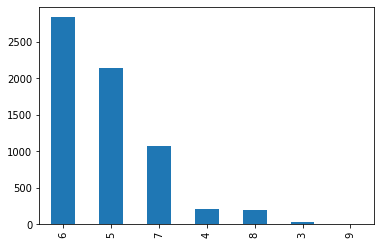

In [81]:
# Use an histogram to see the repartition of
# the wine quality.
data_quality = data["quality"]
data_quality.value_counts().plot.bar(x='la qualité', y='freq')


In [85]:
# Let's consider that a wine is good if its quality is
# at least 7. Replace the values in the "quality" column
# with "good" if quality >= 7 and with "not good" otherwise.
import numpy as np
new_data['quality'] =np.where(new_data['quality']>=7,'good','not good')
new_data

C:\Users\ab\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,not good
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,not good
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,not good
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not good
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,not good
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,not good
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,not good
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,not good


In [87]:
# Create the input data (i.e. the properties) and the
# label (i.e. the quality of wine) and assign them
# to 2 different variables X and y. Our machine learning
# algorithm needs to have both input and output data.
x = new_data.drop('quality',axis=1)
y = new_data['quality']

In [91]:
# Separate your data into a training and a test set
# with 80% for the training set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## Predicting wine quality with a decision tree

In [95]:
print("Is this a classification or a regression problem ?")
print("> Classification problem")
# Import the appropriate version of DecisionTree, then
# train it with your training data.
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

Is this a classification or a regression problem ?
> Classification problem


ValueError: could not convert string to float: 'white'

In [104]:
# Oops, it seems that there is a problem! Indeed, most
# machine learning algorithms only work with numerical vectors.
# And our current training data still have some string values
# (like the type or the quality). We need to transform them before
# training our model.

# sklearn comes with tools to transform non-numerical values.
# In our case, we are going to use a LabelEncoder. Look at the
# documentation to learn what is does.

from sklearn.preprocessing import LabelEncoder

lben = LabelEncoder()
y_new = lben.fit_transform(y)

x['type'] = lben.fit_transform(x['type'])
# now create two encoders: one for the `type` in X, the other
# for the `quality` in y. Use the trained encoders to transform
# X_train, X_test, y_train and y_test.
X_train, X_test, y_train, y_test = train_test_split(x, y_new, test_size=0.20)

In [105]:
# Now train again your Decision Tree.
dtree = DecisionTreeClassifier()



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       252
           1       0.90      0.91      0.90      1041

    accuracy                           0.84      1293
   macro avg       0.75      0.74      0.74      1293
weighted avg       0.84      0.84      0.84      1293

[[142 110]
 [ 94 947]]
Train accuracy: 1.000
Test accuracy: 0.842


In [ ]:
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?

In [ ]:
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the quality of a wine?

## Predicting wine quality with random forests

We saw in the course (and in this example) that Decision Trees can easily overfit. To prevent this, we can use Random forests instead. Random forests are a collection of decision trees, where each decision tree is trained differently. The prediction of the RandomForest is then the average (or the most frequent) prediction of all the decision trees.

In [ ]:
# Use a RandomForest composed of 20 decision trees and
# train it on your data. Evaluate its accuracy. Do you see
# an improvement ?
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train other random forest classifiers with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree ?